In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Dropout, Flatten, Embedding,Reshape,TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras import layers
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from keras.models import load_model
model = load_model('model.h5')

In [2]:
img_dir = '/kaggle/input/persianocrdataset/Shotor_Images'
df=pd.read_csv('/kaggle/input/persianocrdataset/Shotor_Words.csv')
label=df['word']

In [3]:
target_size = (100, 50)
crop_amount = 10

images = []

for i in range(len(df)):
    img_dir = '/kaggle/input/persianocrdataset/Shotor_Images/Shotor_Images/' + df.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
#     img_resized = cv2.resize(binary_image, target_size)
    img_cropped = binary_image[:, crop_amount:-crop_amount]
    images.append(img_cropped)


In [4]:
# target_size=(80,80)
# images=[]
# for i in range(len(df)):
#     img_dir = '/kaggle/input/persianocrdataset/Shotor_Images/Shotor_Images/' + df.loc[i, 'image']
#     image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
#     img_resized = cv2.resize(image, target_size)
#     kernel = np.ones((2, 2), np.uint8)
#     dilated_image = cv2.dilate(img_resized, kernel, iterations=1)
#     images.append(dilated_image)

In [6]:
char_to_index = {char: i for i, char in enumerate(characters)}
index_to_char = {i: char for i, char in enumerate(characters)}
print("Character to Index:")
for char, index in char_to_index.items():
    print(f"{char}: {index}")

print("\nIndex to Character:")
for index, char in index_to_char.items():
    print(f"{index}: {char}")

Character to Index:
 : 0
آ: 1
ئ: 2
ا: 3
ب: 4
ت: 5
ث: 6
ج: 7
ح: 8
خ: 9
د: 10
ذ: 11
ر: 12
ز: 13
س: 14
ش: 15
ص: 16
ض: 17
ط: 18
ظ: 19
ع: 20
غ: 21
ف: 22
ق: 23
ل: 24
م: 25
ن: 26
ه: 27
و: 28
پ: 29
چ: 30
ژ: 31
ک: 32
گ: 33
ی: 34

Index to Character:
0:  
1: آ
2: ئ
3: ا
4: ب
5: ت
6: ث
7: ج
8: ح
9: خ
10: د
11: ذ
12: ر
13: ز
14: س
15: ش
16: ص
17: ض
18: ط
19: ظ
20: ع
21: غ
22: ف
23: ق
24: ل
25: م
26: ن
27: ه
28: و
29: پ
30: چ
31: ژ
32: ک
33: گ
34: ی


In [5]:
images = np.array(images)
images = images / 255.0

labels = label.astype(str).tolist()

characters = sorted(set("".join(labels)))

char_to_index = {char: i for i, char in enumerate(characters)}
index_to_char = {i: char for i, char in enumerate(characters)}

label_sequences = [[char_to_index[char] for char in word] for word in labels]

max_sequence_length = max(len(seq) for seq in label_sequences)
padded_label_sequences = pad_sequences(label_sequences, maxlen=max_sequence_length, padding='post',value=0)


In [6]:
padded_label_sequences[:10]

array([[ 5, 12,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 7,  3, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [12, 28, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [33, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [26, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [20, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 4, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [32, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 4, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [33, 15,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]], dtype=int32)

In [6]:
# del one_hot_labels
# del padded_label_sequences
del label_sequences
del index_to_char
del char_to_index
del labels

In [8]:
# # del one_hot_labels
# del images

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, padded_label_sequences, test_size=0.2, random_state=42,shuffle=False)
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

In [8]:
from tensorflow import keras
def seq2seq_model(input_shape, output_sequence_length, vocab_size):
    model = keras.Sequential()

    # Encoder
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(50,80,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.RepeatVector(output_sequence_length))

    # Decoder
    model.add(layers.LSTM(256, return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))

    return model

In [16]:
# # now: model.output_shape == (None, 32)
# # note: `None` is the batch dimension
# model.add(RepeatVector(3))
# # now: model.output_shape == (None, 3, 32)

In [9]:
input_shape = (50, 80, 1) 
output_sequence_length = 18  # Length of the output sequence
vocab_size = len(characters)  # Number of unique labels (0 to 35)

In [10]:
model = seq2seq_model(input_shape, output_sequence_length, vocab_size)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 80, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 40, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 20, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30720)             0         
                                                                 
 repeat_vector (RepeatVecto  (None, 18, 30720)         0

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
3000/3000 [==============================] - 115s 35ms/step - loss: 0.3859 - accuracy: 0.8844 - val_loss: 0.2004 - val_accuracy: 0.9375
Epoch 2/5
3000/3000 [==============================] - 103s 34ms/step - loss: 0.0815 - accuracy: 0.9768 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 3/5
3000/3000 [==============================] - 103s 34ms/step - loss: 0.0416 - accuracy: 0.9886 - val_loss: 0.0731 - val_accuracy: 0.9789
Epoch 4/5
3000/3000 [==============================] - 102s 34ms/step - loss: 0.0280 - accuracy: 0.9924 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 5/5
3000/3000 [==============================] - 102s 34ms/step - loss: 0.0205 - accuracy: 0.9945 - val_loss: 0.0765 - val_accuracy: 0.9787


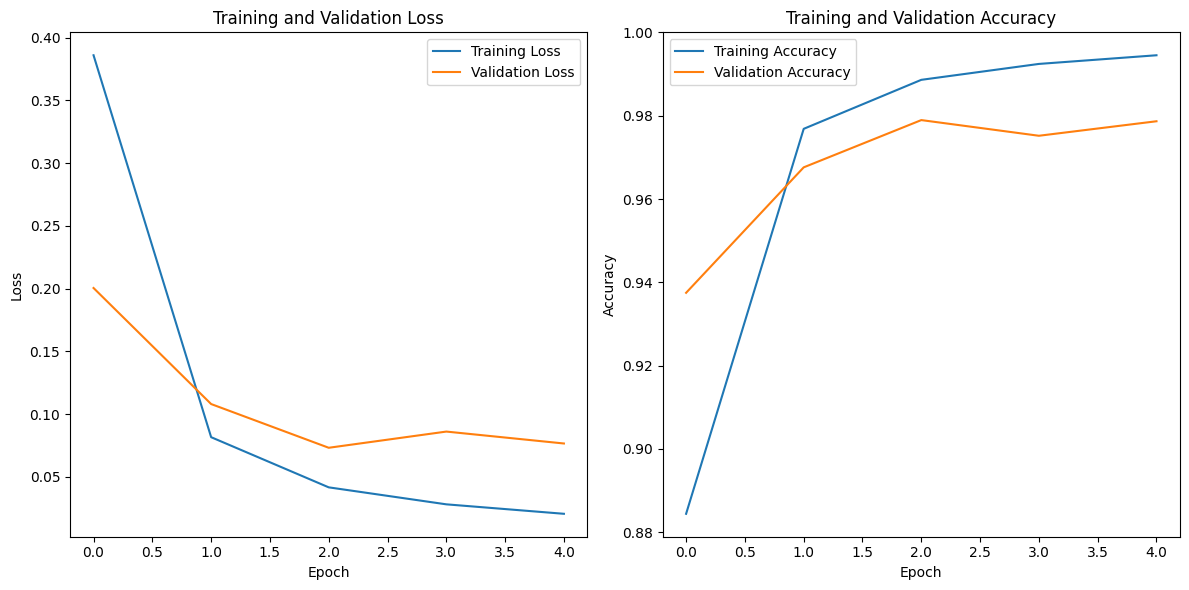

In [13]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
model.save('seq2seq_model.h5')

In [15]:
from IPython.display import FileLink
FileLink(r'seq2seq_model.h5')

/kaggle/working/seq2seq_model.h5

In [14]:
from tensorflow import keras
def seq2seq_cnn_model(input_shape, output_sequence_length, vocab_size):
    cnn_blstm = keras.Sequential()
    cnn_blstm.add(Conv2D(32, (3, 3), activation='relu',input_shape=(50, 80, 1)))
#     cnn_blstm.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
#     cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
#     cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(layers.Flatten())
    cnn_blstm.add(layers.RepeatVector(output_sequence_length))
    
    # Encoder
#     model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(50,80,1)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())
#     model.add(layers.RepeatVector(output_sequence_length))

    # Decoder
#     model.add(layers.LSTM(256, return_sequences=True))
#     cnn_blstm.add(Reshape((-1, 64)))
    cnn_blstm.add(Bidirectional(LSTM(128, return_sequences=True)))
    cnn_blstm.add(Bidirectional(LSTM(64, return_sequences=True)))
#     cnn_blstm.add(Bidirectional(LSTM(32)))
    cnn_blstm.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))

    return cnn_blstm

In [15]:
input_shape = (50, 80, 1) 
output_sequence_length = 18  # Length of the output sequence
vocab_size = len(characters)  # Number of unique labels (0 to 35)

In [16]:
cnn_blstm = seq2seq_cnn_model(input_shape, output_sequence_length, vocab_size)

# Compile the model
cnn_blstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn_blstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 78, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 37, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 16, 128)        73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 8, 128)        

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_cb = cnn_blstm.fit(X_train, y_train, epochs=5, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
3000/3000 [==============================] - 51s 15ms/step - loss: 0.8589 - accuracy: 0.7487 - val_loss: 0.6438 - val_accuracy: 0.8002
Epoch 2/5
3000/3000 [==============================] - 42s 14ms/step - loss: 0.3810 - accuracy: 0.8804 - val_loss: 0.3740 - val_accuracy: 0.8792
Epoch 3/5
3000/3000 [==============================] - 43s 14ms/step - loss: 0.2137 - accuracy: 0.9330 - val_loss: 0.2582 - val_accuracy: 0.9190
Epoch 4/5
3000/3000 [==============================] - 42s 14ms/step - loss: 0.1489 - accuracy: 0.9534 - val_loss: 0.1871 - val_accuracy: 0.9414
Epoch 5/5
3000/3000 [==============================] - 42s 14ms/step - loss: 0.1101 - accuracy: 0.9656 - val_loss: 0.1648 - val_accuracy: 0.9485


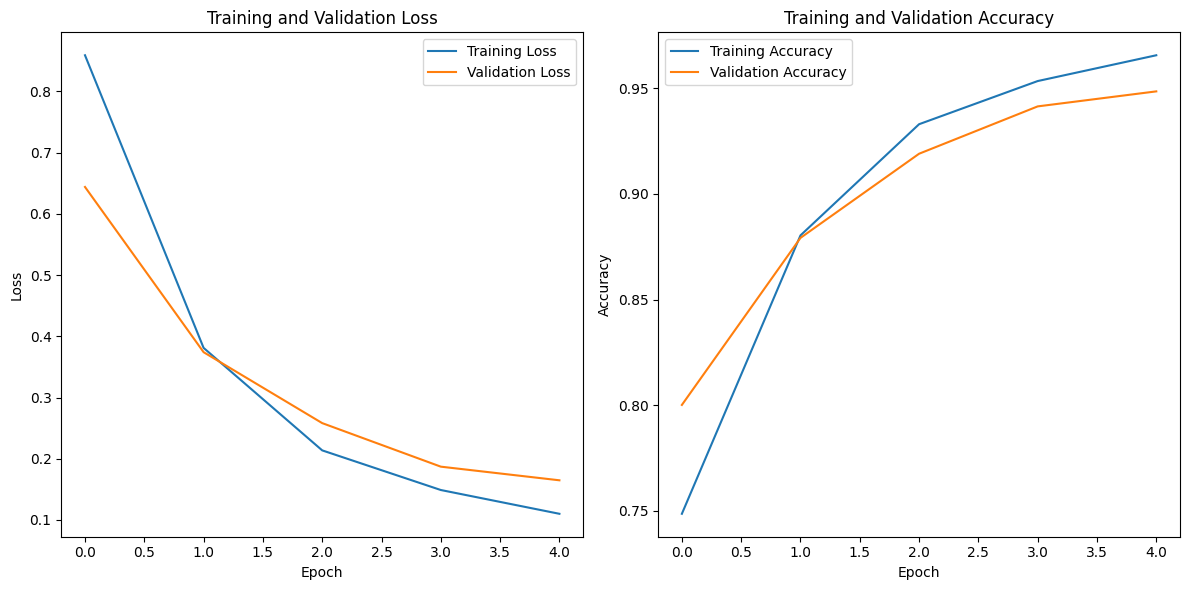

In [19]:
training_loss = history_cb.history['loss']
validation_loss = history_cb.history['val_loss']
training_accuracy = history_cb.history['accuracy']
validation_accuracy = history_cb.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
cnn_blstm.save('cnn_blstm.h5')

In [21]:
from IPython.display import FileLink
FileLink(r'cnn_blstm.h5')

/kaggle/working/cnn_blstm.h5

In [47]:
# cnn_blstm.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
cnn_blstm.add(Conv2D(32, (3, 3), activation='relu',input_shape=(50, 80, 1)))
cnn_blstm.add(Conv2D(32, (3, 3), activation='relu'))
cnn_blstm.add(MaxPooling2D((2, 2)))
cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
cnn_blstm.add(MaxPooling2D((2, 2)))
cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
cnn_blstm.add(MaxPooling2D((2, 2)))

In [48]:
cnn_blstm.add(Reshape((-1, 64)))
cnn_blstm.add(Bidirectional(LSTM(128, return_sequences=True)))
cnn_blstm.add(Bidirectional(LSTM(64, return_sequences=True)))
cnn_blstm.add(Bidirectional(LSTM(32)))

In [49]:
# cnn_blstm.add(Reshape((-1, 32*2)))
cnn_blstm.add(layers.Flatten())
cnn_blstm.add(layers.Reshape((-1, 32 * 2)))
# cnn_blstm.add(layers.Dense(64, activation="relu"))
# cnn_blstm.add(layers.Dense(len(characters), activation='softmax'))
# cnn_blstm.add(LSTM(len(characters), activation='softmax'))
# cnn_blstm.add(Flatten())
# cnn_blstm.add(TimeDistributed(Dense(36, activation='softmax')))
# cnn_blstm.add(TimeDistributed(layers.Dense(len(characters), activation='softmax')))
cnn_blstm.add(TimeDistributed(layers.Dense(18, activation='softmax')))
# cnn_blstm.add(TimeDistributed(layers.Dense(len(characters), activation='softmax'), input_shape=(None, 32*2)))

In [50]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(lr=0.001)
cnn_blstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# cnn_blstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
cnn_blstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 78, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 46, 76, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 38, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 21, 36, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 19, 34, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 9, 17, 64)         0         
 ng2D)                                                

In [52]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = cnn_blstm.fit(X_train, y_train, epochs=50, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32, 18) and logits.shape=(32, 1, 18)


ta injaaaaaaaaaaaa run kon

In [8]:
from tensorflow import keras
def seq2seq_model(input_shape, output_sequence_length, vocab_size):
    model = keras.Sequential()

    # Encoder
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(50,80,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.RepeatVector(output_sequence_length))

    # Decoder
    model.add(layers.LSTM(256, return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))

    return model

In [9]:
input_shape = (50, 80, 1) 
output_sequence_length = 18  # Length of the output sequence
vocab_size = len(characters)  # Number of unique labels (0 to 35)

In [10]:
# Create the seq2seq model
model = seq2seq_model(input_shape, output_sequence_length, vocab_size)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
3000/3000 [==============================] - 112s 34ms/step - loss: 0.3772 - accuracy: 0.8866 - val_loss: 0.1733 - val_accuracy: 0.9462
Epoch 2/5
3000/3000 [==============================] - 101s 34ms/step - loss: 0.0798 - accuracy: 0.9771 - val_loss: 0.1013 - val_accuracy: 0.9704
Epoch 3/5
3000/3000 [==============================] - 102s 34ms/step - loss: 0.0402 - accuracy: 0.9889 - val_loss: 0.1007 - val_accuracy: 0.9696
Epoch 4/5
3000/3000 [==============================] - 102s 34ms/step - loss: 0.0275 - accuracy: 0.9925 - val_loss: 0.0650 - val_accuracy: 0.9814
Epoch 5/5
3000/3000 [==============================] - 101s 34ms/step - loss: 0.0201 - accuracy: 0.9946 - val_loss: 0.0605 - val_accuracy: 0.9829


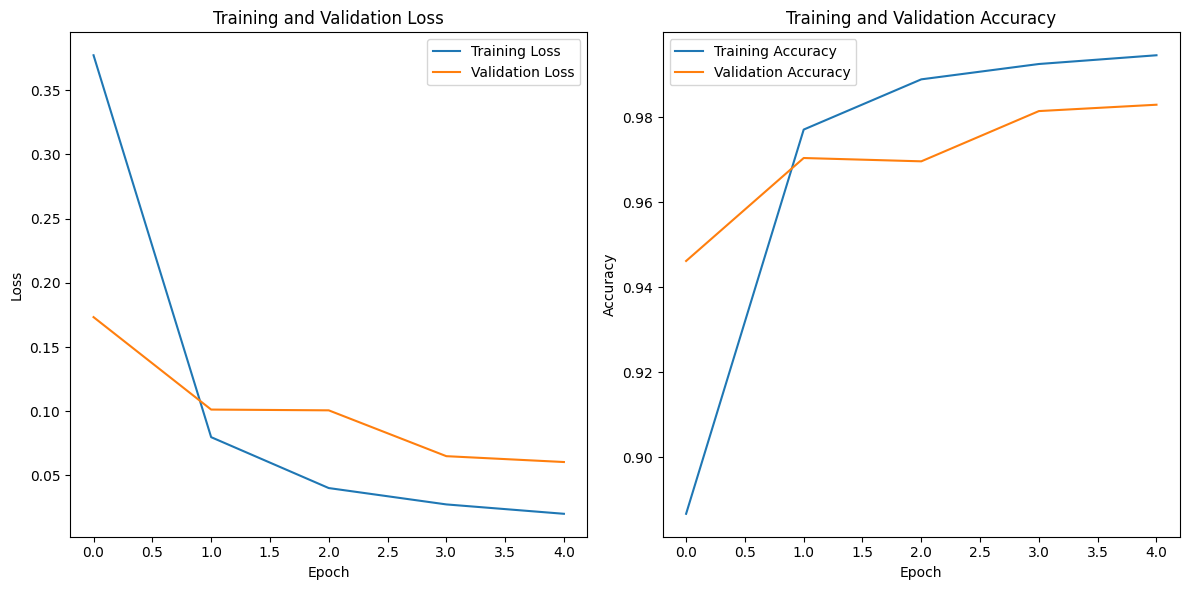

In [12]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
model.save('seq2seq_model.h5')

In [14]:
model.save_weights('model_weights.h5')

In [16]:
model.save('/kaggle/working/seq2seq_model.h5')


<a href="/kaggle/working/model_weights.h5"> Download File </a>

In [23]:
from tensorflow import keras
def seq2seq_cnn_model(input_shape, output_sequence_length, vocab_size):
    cnn_blstm = keras.Sequential()
    cnn_blstm.add(Conv2D(32, (3, 3), activation='relu',input_shape=(50, 80, 1)))
    cnn_blstm.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_blstm.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_blstm.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_blstm.add(MaxPooling2D((2, 2)))
    cnn_blstm.add(layers.Flatten())
    cnn_blstm.add(layers.RepeatVector(output_sequence_length))
    
    # Encoder
#     model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(50,80,1)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())
#     model.add(layers.RepeatVector(output_sequence_length))

    # Decoder
#     model.add(layers.LSTM(256, return_sequences=True))
#     cnn_blstm.add(Reshape((-1, 64)))
    cnn_blstm.add(Bidirectional(LSTM(128, return_sequences=True)))
    cnn_blstm.add(Bidirectional(LSTM(64, return_sequences=True)))
#     cnn_blstm.add(Bidirectional(LSTM(32)))
    cnn_blstm.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))

    return cnn_blstm

In [24]:
cnn_blstm = seq2seq_cnn_model(input_shape, output_sequence_length, vocab_size)

# Compile the model
cnn_blstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_cb = cnn_blstm.fit(X_train, y_train, epochs=5, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

In [ ]:
print(y_train.shape)


In [ ]:
print(np.unique(y_train))


In [ ]:
print(cnn_blstm.predict(X_train).shape)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


In [ ]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())

In [ ]:
img_resized = cv2.resize(images[565], (100,100))

In [9]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
len(images)

120000

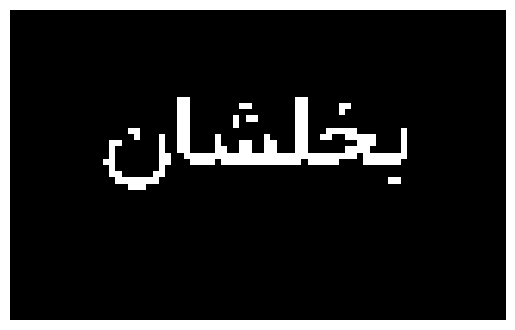

In [5]:
plt.imshow(cv2.cvtColor(images[119841], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
plt.imshow(cv2.cvtColor(images[9841], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
print(train_generator[0][0].shape)  # Print the shape of input data from the generator
print(train_generator[0][1].shape)

In [ ]:
plt.imshow(cv2.cvtColor(x_test[0], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()